# 프로젝트 : SRGAN 활용하기

## 프로젝트 1 : 직접 고른 이미지로 SRGAN 실험하기(고해상도)


* 미국프로야구 토론토 돔구장 사진 사용

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import tensorflow as tf

In [2]:
pwd

'/home/ssac26/ssac_notebook/ENODE'

In [3]:
img = os.getenv('HOME')+'/ssac_notebook/image/dome.jpg'

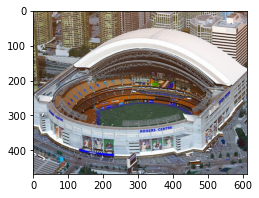

In [4]:
hr_image = cv2.imread(img, cv2.IMREAD_COLOR)

plt.figure(figsize=(6,3))
plt.imshow(hr_image)

* 가로 및 세로 픽셀 수를 1/4로 줄인 저해상도 이미지와 원래 고해상도 이미지 사이에서 학습

(300, 400, 3)


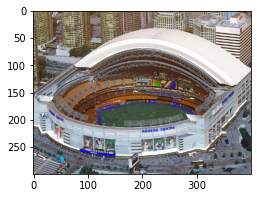

In [5]:
hr = cv2.resize(hr_image, dsize=(400,300))# (가로 픽셀 수, 세로 픽셀 수)

print(hr.shape)

plt.figure(figsize=(6,3))
plt.imshow(hr)
# 원본 고화질

In [6]:
resiz = cv2.resize(hr, dsize=(400//4,300//4),interpolation = cv2.INTER_CUBIC)

* 줄인 이미지를 srgan이용 고화질 이미지 생성

In [7]:
model_file = os.getenv('HOME')+'/aiffel/super_resolution/srgan_G.h5'
srgan = tf.keras.models.load_model(model_file)

In [8]:
def apply_srgan(image):
    image = tf.cast(image[np.newaxis, ...], tf.float32)
    sr = srgan.predict(image)
    sr = tf.clip_by_value(sr, 0, 255)
    sr = tf.round(sr)
    sr = tf.cast(sr, tf.uint8)
    return np.array(sr)[0]

In [9]:
srgan_hr = apply_srgan(resiz)

* 1/4로 줄인 이미지를 다시 원래대로

In [10]:
resiz_1 = cv2.resize(resiz, dsize=(400,300),interpolation = cv2.INTER_CUBIC)

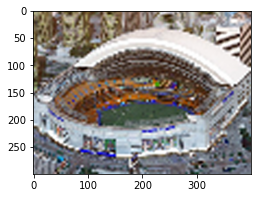

In [11]:
plt.figure(figsize=(6,3))
plt.imshow(resiz_1)

* 시각화

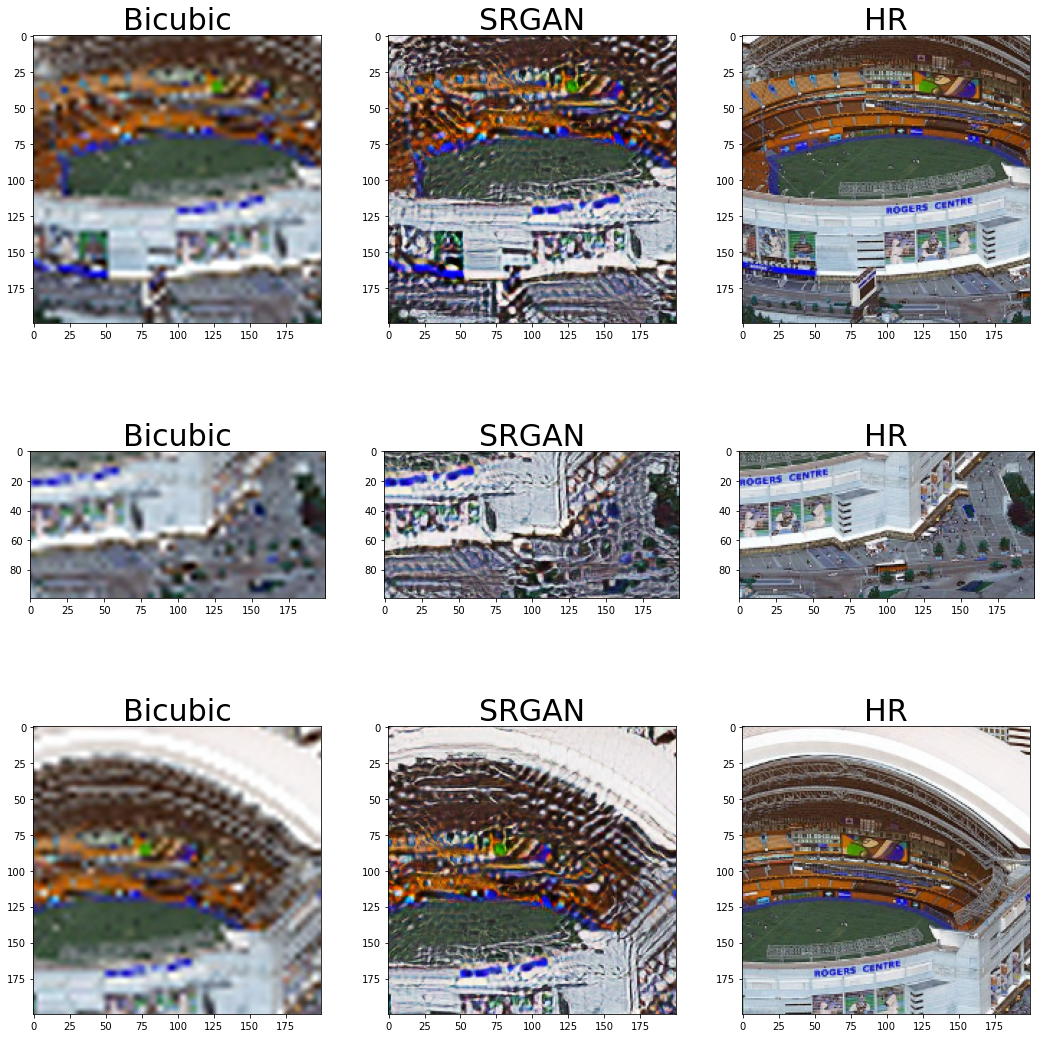

In [12]:
# hr, srgan_hr, resiz_1

# 특정 영역을 잘라낼 함수를 정의합니다.
def crop(image, left_top, x=50, y=100):
    return image[left_top[0]:(left_top[0]+x), left_top[1]:(left_top[1]+y), :]
# 자세히 시각화 하기 위해 3개 영역을 잘라냅니다.
# 아래는 잘라낸 부분의 좌상단 좌표 3개 입니다.
left_tops = [(100,100), (200,200), (50,150)]

images = []
for left_top in left_tops:
    img1 = crop(resiz_1, left_top, 200, 200)
    img2 = crop(srgan_hr , left_top, 200, 200)
    img3 = crop(hr, left_top, 200, 200)
    images.extend([img1, img2, img3])

labels = ["Bicubic", "SRGAN", "HR"] * 3

plt.figure(figsize=(18,18))
for i in range(9):
    plt.subplot(3,3,i+1) 
    plt.imshow(images[i])
    plt.title(labels[i], fontsize=30)

선택한 이미지를 DIV2K 데이터셋에서 학습된 모델로 Super Resolution했을 때 어떠한 결과가 나왔으며, 왜 이러한 결과가 출력되었는지 설명해 봅시다. (정답은 없습니다)


In [13]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

/home/ssac26/anaconda3/envs/aiffel/lib/python3.7/site-packages/skimage/metrics/simple_metrics.py:160: RuntimeWarning: divide by zero encountered in double_scalars
  return 10 * np.log10((data_range ** 2) / err)


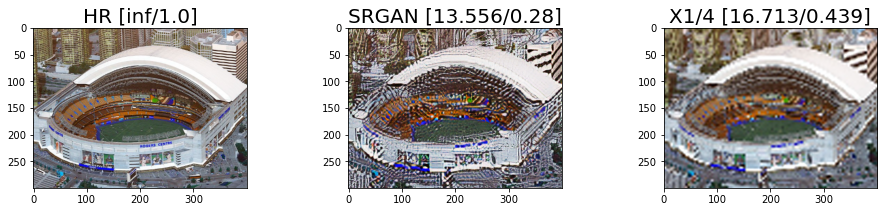

In [14]:
images = [hr, srgan_hr, resiz_1]
titles = ["HR", "SRGAN", "X1/4"]

# 각 이미지에 대해 PSNR을 계산하고 반올림합니다.
psnr = [round(peak_signal_noise_ratio(hr, i), 3) for i in images]
# 각 이미지에 대해 SSIM을 계산하고 반올림합니다.
ssim = [round(structural_similarity(hr, i, multichannel=True), 3) for i in images]

# 이미지 제목에 PSNR과 SSIM을 포함하여 시각화 합니다. 
plt.figure(figsize=(16,10))
for i in range(3):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.title(titles[i] + f" [{psnr[i]}/{ssim[i]}]", fontsize=20)

복원이미지들이 경기장 주변이미지 복원에 있어서 큰 차이를 보였다. GAN은 도로와 주변건물을 부정확하게 표현하여서
이미지를 복원한다 했을때  저화질 이미지를 cv2기능을 이용한 복원보다 성능이 떨어지는것 같다.

# (적당히) 낮은 해상도를 가진 이미지를 검색해서 한 장 고른 후 저장하고 불러옵니다.
불러온 이미지를 입력으로 SRGAN을 이용해 고해상도 이미지를 생성합니다. 이전에 사용한 apply_srgan 함수를 사용하면 쉽습니다.
1.에서 불러온 이미지에 bicubic interpolation을 적용해 가로 및 세로 픽셀 수를 다시 4배로 늘립니다. cv2.resize()를 사용해 봅시다.
2개 이미지(3.의 Bicubic의 결과, 2.의 SRGAN의 결과)를 나란히 시각화합니다. 각 이미지의 제목에 어떤 방법에 대한 결과인지 표시해 주세요. 이전 시각화에 사용했던 코드를 참고하면 어렵지 않습니다.
선택한 이미지를 DIV2K 데이터셋에서 학습된 모델로 Super Resolution했을 때 어떠한 결과가 나왔으며, 왜 이러한 결과가 출력되었는지 설명해 봅시다. (정답은 없습니다)

## 2. 적당히 낮은 해상도

In [52]:
img2 = os.getenv('HOME')+'/ssac_notebook/image/chic.jpg'

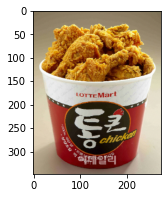

In [54]:
lr_image = cv2.imread(img2, cv2.IMREAD_COLOR)
lr_image = cv2.cvtColor(lr_image,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,3))
plt.imshow(lr_image)

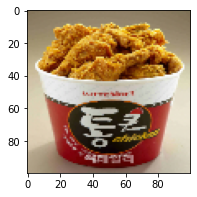

In [55]:
# bicubic적용해서 1/4
lr = cv2.resize(lr_image, dsize=(100,100))# (가로 픽셀 수, 세로 픽셀 수)
plt.figure(figsize=(6,3))
plt.imshow(lr)
# 원본 저해상도 사용

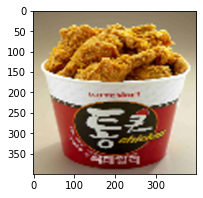

In [56]:
lr_re = cv2.resize(lr, dsize=(lr.shape[0]*4,lr.shape[1]*4),interpolation = cv2.INTER_CUBIC)
plt.figure(figsize=(6,3))
plt.imshow(lr_re)

In [57]:
srgan_lr = apply_srgan(lr)

In [58]:
srgan_lr.shape, lr_re.shape

((400, 400, 3), (400, 400, 3))

In [59]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

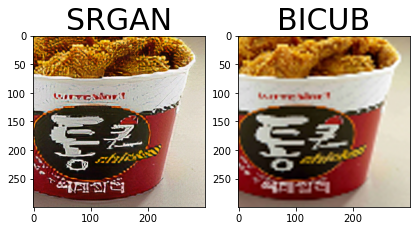

In [64]:
# srgan_lr, lr_re

# 특정 영역을 잘라낼 함수를 정의합니다.
def crop(image, left_top, x=50, y=100):
    return image[left_top[0]:(left_top[0]+x), left_top[1]:(left_top[1]+y), :]
# 자세히 시각화 하기 위해 3개 영역을 잘라냅니다.
# 아래는 잘라낸 부분의 좌상단 좌표 3개 입니다.
left_tops = [(100,100), (50,150)]

images = []
for left_top in left_tops:
    img1 = crop(srgan_lr, left_top, 400, 400)
    img2 = crop(lr_re, left_top, 400, 400)
    images.extend([img1, img2])

labels = ["SRGAN", "BICUB"] 
plt.figure(figsize=(6,6))
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.tight_layout()
    plt.title(labels[i], fontsize=30)
    plt.imshow(images[i])
    

/home/ssac26/anaconda3/envs/aiffel/lib/python3.7/site-packages/skimage/metrics/simple_metrics.py:160: RuntimeWarning: divide by zero encountered in double_scalars
  return 10 * np.log10((data_range ** 2) / err)


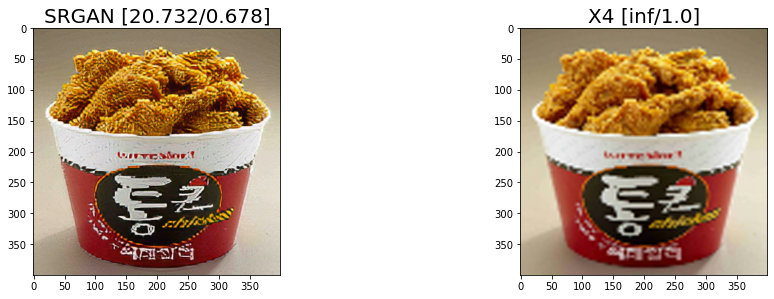

In [61]:
images = [srgan_lr, lr_re]
titles = ["SRGAN", "X4"]

# 각 이미지에 대해 PSNR을 계산하고 반올림합니다.
psnr = [round(peak_signal_noise_ratio(lr_re, i), 3) for i in images]
# 각 이미지에 대해 SSIM을 계산하고 반올림합니다.
ssim = [round(structural_similarity(lr_re, i, multichannel=True), 3) for i in images]

# 이미지 제목에 PSNR과 SSIM을 포함하여 시각화 합니다. 
plt.figure(figsize=(16,10))
for i in range(2):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i])
    plt.title(titles[i] + f" [{psnr[i]}/{ssim[i]}]", fontsize=20)

저해상도 이미지를 대상으로 학습했을때 시각상으로는 SRGAN이 더 작업이 잘된거 같지만 평가점수는 저해상도이미지를 4배로 한것이 높게 나왔다.  
처음 사용한 이미지가 100*100사이즈이고, 작업에 사용한 사진들은 400*400사이즈라 서로 평가하기엔 사이즈가 안맞아서 저화질이미지를 리사이즈 한것을 기준으로 삼아서
SRGAN보다 resize한 이미지의 값이 더 높게 나왔다.  

저화질이미지를 평가기준으로 쓰려면 다른 이미지도 사이즈를 줄여야하는 문제가 생기는데 이를 어찌 해결해야할지 잘 모르겠으므로 고화질보다 저화질이미지의 평가가 더 어려워 보인다.